# Principles of Spatial Date Mining and Machine WS2022/2023 
# Lectuer team: Martin Werner, Hao Li

## Excercise 03: Clustering and Classification - Part 1

In this exercise, we will try to implement three different clustering algorithm with the IRIS dataset (http://archive.ics.uci.edu/ml/datasets/Iris), which we have used as an example during the lecutre 03. 

First, we would load the datasets together, do some basic data exploration, and plot the raw data point. 

Then, there are mainly two tasks for you in this excercise:

- to build a **K-Means clustering** on the IRIS dataset and explore the effect of different K values via the Elbow method.
    
- to build two different clustering algorithm (i.e., **K-Medoids and DBSCAN**) for comparision.

## Example Code:

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

### Load the dataset

In [3]:
# loading the Bouston dataset direclty from sklearn
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_classes = pd.DataFrame(iris.target)
# confirmed data loading
print("Now the Iris data is loaded")

Now the Iris data is loaded


### Now let us print the attributes,, and check which attributes are available

In [4]:
# Print the python data tpye and size of boston dataset together with the feature_names
print(type(iris_df))
print('\n')
print(iris_df.keys())
print('\n')
print(iris_df.shape)

<class 'pandas.core.frame.DataFrame'>


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


(150, 4)


## The features can be summarized as follows (http://archive.ics.uci.edu/ml/datasets/Iris):


The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). These measures were used to create a linear discriminant model to classify the species. The dataset is often used in data mining, classification and clustering examples and to test algorithms.

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. Iris class:
- Iris Setosa
- Iris Versicolour
- Iris Virginica

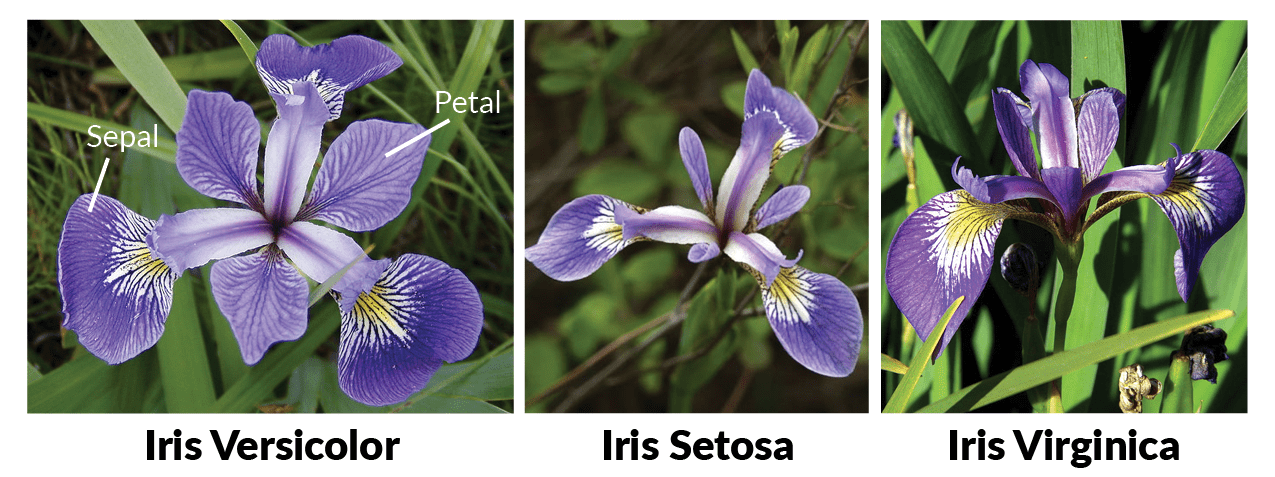
[link](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)



In [5]:
# get the head from the Irix dataframe
iris_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [6]:
# print out the Iris class: 0 is setosa, 1 is versicolor, 2 is virginica
iris_classes

0
0    0
1    0
2    0
3    0
4    0
..  ..
145  2
146  2
147  2
148  2
149  2

[150 rows x 1 columns]

In [7]:
# get the values for Iris data and corresponding classes
iris_data = iris_df.values
target = iris_classes.values

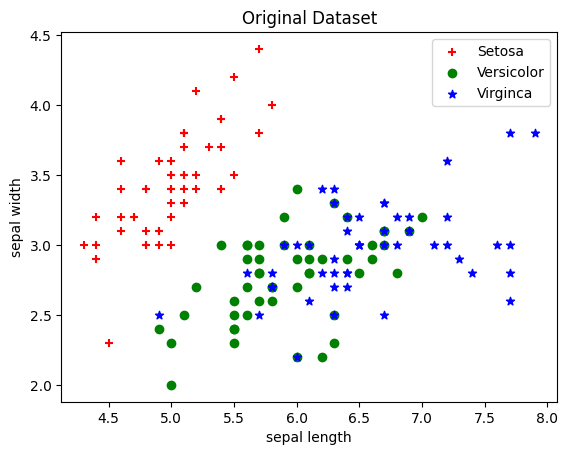

In [8]:
# visualising original dataset
for i in range(0,len(target)):
    if target[i]==0:
        c1=plt.scatter(iris_data[i,0],iris_data[i,1],c='r',marker='+')
    if target[i]==1:
        c2=plt.scatter(iris_data[i,0],iris_data[i,1],c='g',marker='o')
    if target[i]==2:
        c3=plt.scatter(iris_data[i,0],iris_data[i,1],c='b',marker='*')
plt.legend([c1,c2,c3],['Setosa','Versicolor','Virginca'])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Original Dataset')
plt.show()

# Now, it is your turn!

## Task No.1: build a **K-Means clustering** on the IRIS dataset and explore the effect of different K values via the Elbow method.

### Q1.1: import K-Means from sklearn.cluster and set K values (n_clusters are 3)

In [9]:
# import KMeans algorithm from sklearn
from sklearn.cluster import KMeans

### BEGIN SOLUTION
# create the clustering 
kmeans=KMeans(n_clusters=3,random_state=0)
### END SOLUTION

# fit to the data
kmeans.fit(iris_data)
result = kmeans.labels_


In [10]:
assert kmeans.n_clusters == 3,print( "incorrect distance image")

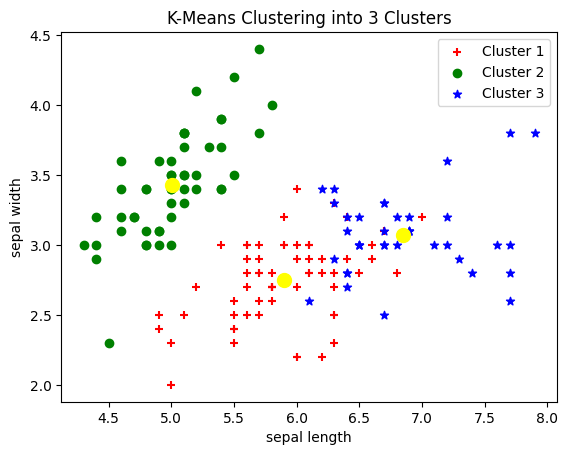

In [11]:
# visualizing
for i in range(0,iris_data.shape[0]):
    if result[i]==0:
        c1=plt.scatter(iris_data[i,0],iris_data[i,1],c='r',marker='+')
    if result[i]==1:
        c2=plt.scatter(iris_data[i,0],iris_data[i,1],c='g',marker='o')
    if result[i]==2:
        c3=plt.scatter(iris_data[i,0],iris_data[i,1],c='b',marker='*')
# plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 100, c = 'yellow', label = 'Centroids')

# plotting the legend
plt.legend([c1,c2,c3],['Cluster 1','Cluster 2','Cluster 3'])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('K-Means Clustering into 3 Clusters')
plt.show()

### Q1.2: apply the similar KMeans clusering wtih different K values and monitor the change of **inertia** values.

ps: In order to evaluate the ability of k-means initializations strategies to make the algorithm convergence robust, this can be measured by the relative standard deviation of the **inertia** of the clustering (i.e. the sum of squared distances to the nearest cluster center).

In [12]:
# try different numer of k
cluster=[]

### BEGIN SOLUTION
# create a loop for multiple KMeans clustering
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(iris_data)
    cluster.append(kmeans.inertia_)
### END SOLUTION

In [13]:

assert len(cluster) == 10, print('incorrect distance image')


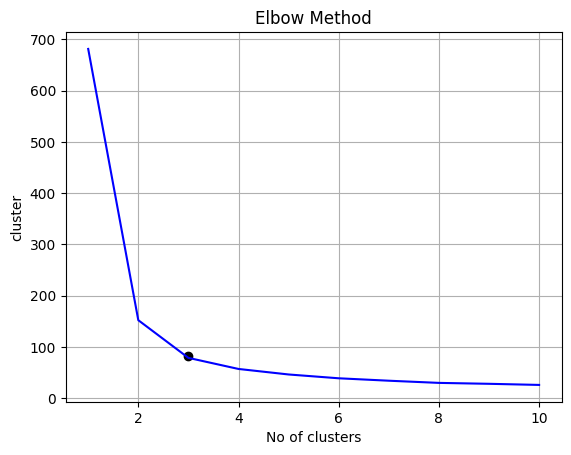

In [14]:
# plotting the results
plt.plot(range(1,11),cluster,color="b")
plt.title("Elbow Method")
plt.xlabel("No of clusters")
plt.ylabel("cluster")
plt.grid()
plt.scatter(3,83,color='black')

## Q:Now let's try to use K=2 for the K-Means algorithm and plot the clustering results.

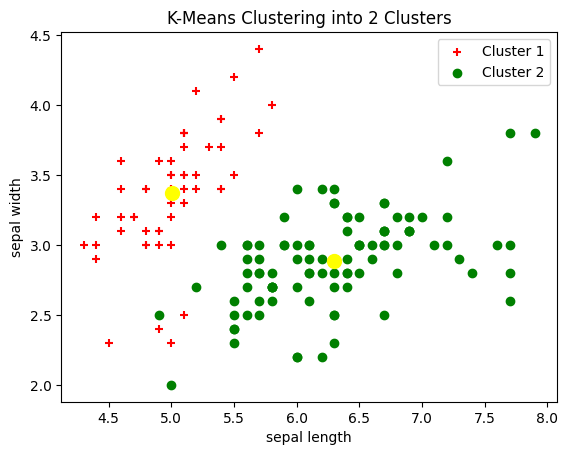

In [15]:
# create the KMeans clustering 
### BEGIN SOLUTION
kmeans=KMeans(n_clusters=2,random_state=0)

# fit to the data
kmeans.fit(iris_data)
result = kmeans.labels_

# visualizing
for i in range(0,iris_data.shape[0]):
    if result[i]==0:
        c1=plt.scatter(iris_data[i,0],iris_data[i,1],c='r',marker='+')
    if result[i]==1:
        c2=plt.scatter(iris_data[i,0],iris_data[i,1],c='g',marker='o')
# plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 100, c = 'yellow', label = 'Centroids')

# plotting the legend
plt.legend([c1,c2,c3],['Cluster 1','Cluster 2'])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('K-Means Clustering into 2 Clusters')
plt.show()
### END SOLUTION

In [16]:
assert kmeans.n_clusters ==2, 'incorrect distance image'

## Task No.2: build two different clustering algorithm (i.e., **K-Medoids and DBSCAN**) for comparision.

### Q2.1: install the scikit-learn-extra package and import KMedoids for clutering 

In [52]:
# install scikit-learn-extra package
#!pip install pipwin
#!pip install sklearn_extras
#!pip list
#!pip install cython
!pip install numpy
!pip install scipy
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [71]:
!conda install -c conda-forge scikit-learn-extra

/bin/bash: line 1: conda: command not found


In [68]:
# import KMedoids algorithm from sklearn_extra
from sklearn_extra.cluster import KMedoids
### BEGIN SOLUTION
# create the clustering 
kmedoids = KMedoids(n_clusters=3, random_state=0)

# fit to the data
kmedoids.fit(iris_data)
result_kmediods = kmedoids.labels_


# Visualizing
for i in range(0,iris_data.shape[0]):
    if result_kmediods[i]==0:
        c1=plt.scatter(iris_data[i,0],iris_data[i,1],c='r',marker='+')
    if result_kmediods[i]==1:
        c2=plt.scatter(iris_data[i,0],iris_data[i,1],c='g',marker='o')
    if result_kmediods[i]==2:
        c3=plt.scatter(iris_data[i,0],iris_data[i,1],c='b',marker='*')
# plotting the centroids
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:,1],s = 100, c = 'yellow', label = 'Medoids')

# plotting the legent
plt.legend([c1,c2,c3],['Cluster 1','Cluster 2','Cluster 3'])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('K-Means Clustering into 3 Clusters')
plt.show()
### END SOLUTION

ModuleNotFoundError: No module named 'sklearn_extra'

In [24]:
assert kmedoids.n_clusters !=0, 'incorrect middle line'

NameError: name 'kmedoids' is not defined

### Q2.2: import DBSCAN from sklearn.cluster and test different values of **eps** and **min_samples** .

In [56]:
# import the DBSCAN clustering algorithm
from sklearn.cluster import DBSCAN

# create the clustering 
dbscan=DBSCAN(eps=0.3,min_samples=3)
result_db=dbscan.fit_predict(iris_data)

print("Now the DBSCAN clustering is ready!")

Now the DBSCAN clustering is ready!


In [59]:
assert dbscan.eps!=0 and dbscan.min_samples!=0, 'incorrect distance image'

In [ ]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(result_db)) - (1 if -1 in result_db else 0)
n_noise_ = list(result_db).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

In [ ]:
# visualizing the first three clusters
for i in range(0,iris_data.shape[0]):
    if result_db[i]==0:
        c1=plt.scatter(iris_data[i,0],iris_data[i,1],c='r',marker='+')
    if result_db[i]==1:
        c2=plt.scatter(iris_data[i,0],iris_data[i,1],c='g',marker='o')
    if result_db[i]==2:
        c3=plt.scatter(iris_data[i,0],iris_data[i,1],c='b',marker='*')
plt.legend([c1,c2,c3],['Cluster 1','Cluster 2','Cluster 3'])
plt.title('DBSCAN Result')

## Well Done! 

Now you manage three basic clustering algorithm we introducted in the lecture. Moreover, by comparing their performanc in IRIS dataset, we know why their pros and cons. 

## Good job! See you in the next part.